In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Loading the Titanic dataset from a CSV file
titanic_df = pd.read_csv("titanic.csv")

# Displaying the first few rows of the dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Displaying the shape of the dataset (rows, columns)
print("Dataset Shape:", titanic_df.shape)

# Displaying information about the dataset, including data types and non-null counts
titanic_df.info()

Dataset Shape: (418, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


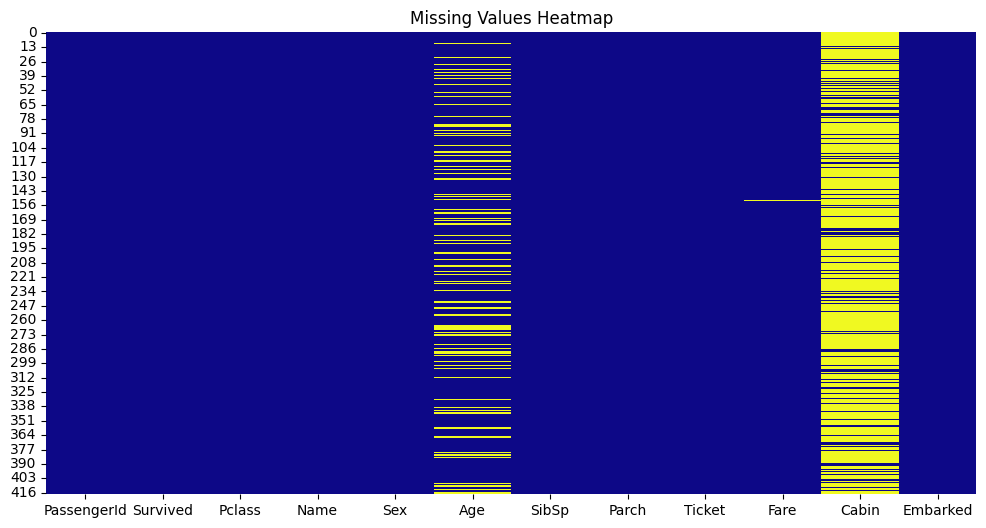

In [5]:
# Creating a heatmap to visualize missing values in the dataset
plt.figure(figsize=(12, 6))
sns.heatmap(titanic_df.isnull(), cmap='plasma', cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [6]:
# Displaying the number of missing values in each column
missing_values = titanic_df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# Dropping the 'Cabin' column due to a high number of missing values
titanic_df.drop('Cabin', axis=1, inplace=True)

# Displaying the first two rows after dropping 'Cabin'
titanic_df.head(2)


Missing Values in Each Column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S


In [7]:
# Displaying the count of unique values in the 'Embarked' column
embarked_counts = titanic_df['Embarked'].value_counts()
print("Embarked Value Counts:\n", embarked_counts)

# Dropping all rows with any remaining missing values
titanic_df.dropna(inplace=True)

# Verifying that there are no more missing values
print("Missing Values After Dropping:\n", titanic_df.isnull().sum())


Embarked Value Counts:
 Embarked
S    270
C    102
Q     46
Name: count, dtype: int64
Missing Values After Dropping:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Encoding Categorical Variables

In [8]:
# Replacing categorical text data with numerical values for 'Sex' and 'Embarked'
titanic_df.replace({
    'Sex': {'male': 0, 'female': 1},
    'Embarked': {'S': 0, 'C': 1, 'Q': 2}
}, inplace=True)

# Displaying the first few rows after encoding
titanic_df.head()


<ipython-input-8-46de31160b7e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_df.replace({


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


Preparing Features and Target Variables

In [9]:
# Selecting feature columns by dropping unnecessary columns
X = titanic_df.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis=1)

# Selecting the target variable
y = titanic_df['Survived']

# Displaying the shapes of features and target
print("Features Shape:", X.shape)
print("Target Shape:", y.shape)


Features Shape: (331, 7)
Target Shape: (331,)


Splitting the Dataset into Training and Testing Sets

In [10]:
# Splitting the data into training and testing sets with 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Displaying the shape of the training features
print("Training Features Shape:", X_train.shape)


Training Features Shape: (264, 7)


Building and Training the Logistic Regression Model

In [11]:
# Initializing the Logistic Regression model
lg = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence

# Fitting the model on the training data
lg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Making Predictions and Evaluating the Model

In [13]:
# Predicting the target for the test set
y_pred = lg.predict(X_test)

# Calculating and printing the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Displaying the predicted values
y_pred



Model Accuracy: 100.00%


array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1])

In [14]:
# Creating a sample input for prediction
# The input features are in the order of the X dataframe
# (Pclass, Sex, Age, SibSp, Parch, Fare, Embarked)
input_data = (3, 1, 22.0, 1, 1, 12.2875, 0)

# Converting the input data to a NumPy array
input_np = np.asarray(input_data)

# Reshaping the input to match the model's expected input shape
prediction = lg.predict(input_np.reshape(1, -1))

# Interpreting and printing the prediction result
if prediction[0] == 1:
    print('This person Survived')
else:
    print('This person Did Not Survive')

This person Survived


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [15]:
# Displaying the first few rows of the feature DataFrame
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0
